<a href="https://colab.research.google.com/github/abhisheksu38/Task_System1/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Random Forest Model

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [10]:
# Load dataset
df = pd.read_csv('/content/Cleaned_marketing_campaign (1).csv')

In [11]:
# Fill missing values
df['Income'] = df['Income'].fillna(df['Income'].mean())
df = df.dropna(subset=['Family_Size'])  # Drop if target is missing
df['Family_Size'] = df['Family_Size'].astype(int)

# Feature matrix and target
X = df.select_dtypes(include=['number']).drop(columns=['Family_Size'])
y = df['Family_Size']

# Optional: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [12]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall   :", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score :", f1_score(y_test, y_pred, average='weighted'))

Accuracy : 0.6294642857142857
Precision: 0.6304363472092059
Recall   : 0.6294642857142857
F1-Score : 0.6134627127988341


## Hyperparameter Tuning

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the model
rf = RandomForestClassifier(random_state=42)
# Set up GridSearch
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
# Fit the grid search
grid_search.fit(X_train, y_train)

# Best model and parameters
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [17]:
import joblib

# Save best model
joblib.dump(best_rf, 'best_random_forest_model.pkl')

print("Best Random Forest model saved as 'best_random_forest_model.pkl'")


Best Random Forest model saved as 'best_random_forest_model.pkl'


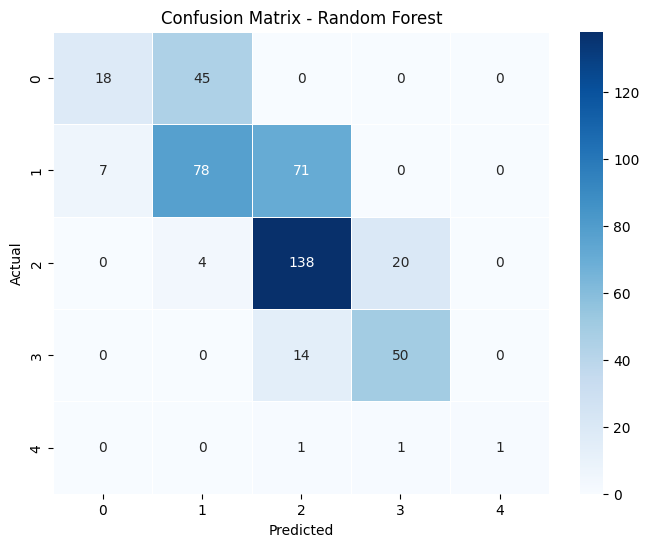

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict using the best model
y_pred = best_rf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Integration into the workflow

In [23]:
import joblib

# Assuming this is your scaler
joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved as scaler.pkl")


Scaler saved as scaler.pkl


In [24]:
scaler = joblib.load('scaler.pkl')

In [25]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler

# Load artifacts
scaler = joblib.load('scaler.pkl')  # You already saved this
model = joblib.load('/content/best_random_forest_model.pkl')  # Tuned Random Forest

# Wrap preprocessing
def preprocess_input(new_data_df):
    # Fill missing values
    new_data_df['Income'] = new_data_df['Income'].fillna(new_data_df['Income'].mean())
    new_data_df = new_data_df.dropna(subset=['Family_Size'])  # Target
    new_data_df['Family_Size'] = new_data_df['Family_Size'].astype(int)

    # Select numeric features and scale
    X_new = new_data_df.select_dtypes(include=['number']).drop(columns=['Family_Size'])
    X_scaled = scaler.transform(X_new)
    return X_scaled, new_data_df['Family_Size']


In [26]:
def predict_family_size(input_df):
    X_scaled, y_true = preprocess_input(input_df)
    y_pred = model.predict(X_scaled)
    return y_pred, y_true

In [28]:
# Load new batch or reuse the same file
df_new = pd.read_csv("/content/Cleaned_marketing_campaign (1).csv")

# Predict
predicted, actual = predict_family_size(df_new)

# Display comparison
results = pd.DataFrame({
    'Actual': actual.values,
    'Predicted': predicted
})

print(results.head())


   Actual  Predicted
0       1          1
1       3          3
2       2          2
3       3          3
4       3          3
